<a href="https://colab.research.google.com/github/fridaruh/Curso_Intro_AI_Crehana/blob/master/Crehana_PLN_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [67]:
import tweepy
import pandas as pd
import datetime

In [68]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [69]:
api = tweepy.API(auth)

In [70]:
twitter_users = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search, q='cinepolis', count=1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'es':
      twitter_users.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

Ejemplo cambiando parámetros:

In [71]:
twitter_users_2 = []
tweet_time_2 = []
tweet_string_2 = []

for tweet in tweepy.Cursor(api.search, q='@Fridaruh').items():
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'en':
      twitter_users_2.append(tweet.user.name)
      tweet_time_2.append(tweet.created_at)
      tweet_string_2.append(tweet.text)

In [72]:
df = pd.DataFrame({'name':twitter_users, 'time':tweet_time, 'tweet':tweet_string })

In [73]:
df.shape

(283, 3)

Exportamos el dataframe a un archivo csv

In [74]:
df.to_csv('tweets_cinepolis.csv')

En caso de que no tengas acceso a la API, tendrás que ejecutar esta celda donde importas el archivo csv

In [75]:
df = pd.read_csv('/content/tweets_cinepolis.csv')

In [76]:
df.head()

,Unnamed: 0,name,time,tweet
0,0,HEIDI 🦠,2022-03-13 01:41:54,Igual el mio íntimo amigo Joel jajaj https://t...
1,1,Ingrid Hidalgo,2022-03-13 01:41:52,Inolvidable el día de hoy gracias...\n@bts_big...
2,2,Cho⚡,2022-03-13 01:41:52,@yur_alma En cinepolis Ciudad Hidalgo también ...
3,3,male lvs Zay ♡♥,2022-03-13 01:41:44,Gracias Cinépolis por ser parte del día más fe...
4,4,Macarenita_2015,2022-03-13 01:41:40,"@Cinepolis La mejor experiencia de mi vida , n..."


Convierto los tweets a listas

In [77]:
data = df['tweet'].to_list()

In [78]:
data

['Igual el mio íntimo amigo Joel jajaj https://t.co/gxAJ16U2J3',
 'Inolvidable el día de hoy gracias...\n@bts_bighit \n@Cinepolis \n@BTS_twt \n#BTSCONCERT https://t.co/oV5wj6E5fN',
 '@yur_alma En cinepolis Ciudad Hidalgo también dan de Doritos Nachos y de Tostitos.',
 'Gracias Cinépolis por ser parte del día más feliz de mi vida \U0001fac2\U0001fac2\n@BTS_twt \n@Cinepolis https://t.co/oQno9fLIfi',
 '@Cinepolis La mejor experiencia de mi vida , nunca lo voy a olvidar 💜 https://t.co/ujYvCa48OJ',
 '@Cinepolis Gracias Cinépolis por darnos esta experiencia inolvidable del concierto y darnos la oportunidad de verlo… https://t.co/lB2iyEz9gZ',
 '@Cinepolis Gracias Cinépolis por hacer este sueño realidad',
 'unas muchachas de la sala me dieron esta pc de hobi trabajador de cinépolis JAHAJAKSJAJ SOY FELIZ https://t.co/kpup5uSsiZ',
 'Muchos estuvieron de acuerdo otros no, pero en ese momento la emoción fue tan grande, es genial ser parte de este f… https://t.co/SbD38Fklwc',
 'uno de los mejores d

In [79]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [80]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
texto = []

for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  texto.append(token_2)

In [82]:
#texto es una lista de listas 

In [83]:
#texto

In [84]:
flatten = [w for l in texto for w in l]

In [85]:
import string
puntuacion = list(string.punctuation)

In [86]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [87]:
puntuacion.append('https')
puntuacion.append('co')
puntuacion.append('t')

In [88]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'https',
 'co',
 't']

In [89]:
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
df_2 = [w for w in flatten if w not in stop_words_n]

In [91]:
df_3 = [w for w in df_2 if w not in puntuacion]

In [92]:
freq_words = nltk.FreqDist(df_3)

In [93]:
freq_words.most_common(15)

[('cinepolis', 279),
 ('gracias', 160),
 ('experiencia', 52),
 ('cinépolis', 49),
 ('joel', 47),
 ('tío', 37),
 ('muchas', 23),
 ('concierto', 20),
 ('mejor', 19),
 ('...', 18),
 ('army', 16),
 ('bts_twt', 15),
 ('bts', 14),
 ('cine', 13),
 ('ustedes', 13)]

In [94]:
omitir_palabras = ['cinepolis','cinépolis']

In [95]:
df_4 =  [w for w in df_3 if w not in omitir_palabras]

In [96]:
freq_words = nltk.FreqDist(df_4)

In [97]:
freq_words.most_common(15)

[('gracias', 160),
 ('experiencia', 52),
 ('joel', 47),
 ('tío', 37),
 ('muchas', 23),
 ('concierto', 20),
 ('mejor', 19),
 ('...', 18),
 ('army', 16),
 ('bts_twt', 15),
 ('bts', 14),
 ('cine', 13),
 ('ustedes', 13),
 ('vida', 12),
 ('sala', 12)]

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

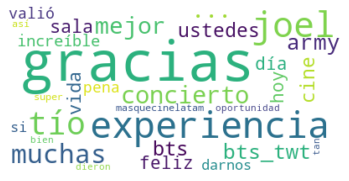

In [99]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()